Can I make a tile file in .gpkg format????

Following code is created by chatGPT----

In [1]:
import geopandas as gpd
from shapely.geometry import Polygon
# tiles
# create all h3 l3 hexgon tiles . two many .... 
# no need to consider boundary then. 

In [2]:
#!pip install geopandas

In [3]:
# Define the coordinates of the rectangle vertices
xmin, ymin = -70, 0  # Minimum x and y coordinates
xmax, ymax =  -69, 1 # Maximum x and y coordinates

In [4]:
# Create the rectangle geometry using Shapely
polygon = Polygon([(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)])


In [5]:
# Create a GeoDataFrame with the rectangle geometry
data = {'id': [1], 'geometry': [polygon]}
gdf = gpd.GeoDataFrame(data, geometry='geometry')

In [6]:
# Write the GeoDataFrame to the GeoPackage file
gdf.to_file('tile.gpkg', driver='GPKG')

In [11]:
### write a loop for global data tiles
#!pip install h3pandas

In [15]:
#### h3 resolution 0 hex gons
import h3
import h3pandas
import geopandas as gpd
import numpy as np
import pandas as pd

# Define the range and interval
lon_range = np.arange(-175, 185, 10)
lat_range = np.arange(-85, 95, 10)

# Create a meshgrid of longitude and latitude values
lon, lat = np.meshgrid(lon_range, lat_range)

# Create a DataFrame with the longitude and latitude values
df = pd.DataFrame({'lng': lon.flatten(), 'lat': lat.flatten()})

# Print the DataFrame
print(df)



     lng  lat
0   -175  -85
1   -165  -85
2   -155  -85
3   -145  -85
4   -135  -85
..   ...  ...
643  135   85
644  145   85
645  155   85
646  165   85
647  175   85

[648 rows x 2 columns]


In [16]:

dfh3 = df.h3.geo_to_h3(0)
dfh3.head()

,lng,lat
h3_00,,
80f3fffffffffff,-175,-85
80f3fffffffffff,-165,-85
80f3fffffffffff,-155,-85
80f3fffffffffff,-145,-85
80f3fffffffffff,-135,-85


<AxesSubplot:xlabel='lng', ylabel='lat'>

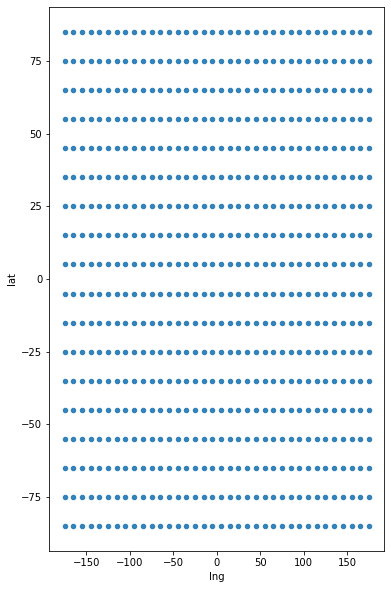

In [13]:
df.plot.scatter(x='lng', y='lat', figsize=(6,10), alpha=0.9)

In [14]:
dfh3 = dfh3.drop(columns=['lng', 'lat']).groupby('h3_00').sum()

In [15]:
gdfh3 = dfh3.h3.h3_to_geo_boundary()
gdfh3.head()

,geometry
h3_00,
8001fffffffffff,"POLYGON ((31.83128 68.92996, 62.34534 69.39360..."
8003fffffffffff,"POLYGON ((145.55820 87.36470, -163.45687 76.14..."
8005fffffffffff,"POLYGON ((94.14309 76.16304, 117.81293 66.2032..."
8007fffffffffff,"POLYGON ((0.32561 73.31022, -34.75842 81.27137..."
8009fffffffffff,"POLYGON ((-10.44498 63.09505, 5.52365 55.70677..."


<AxesSubplot:>

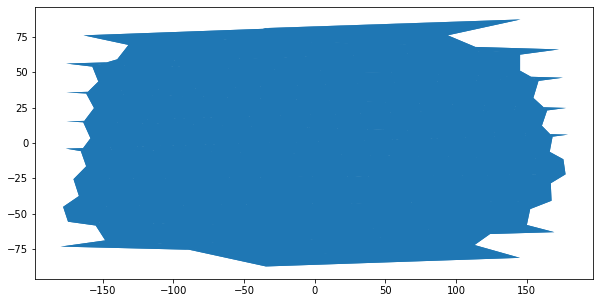

In [16]:
gdfh3.plot(figsize=(10, 10))

In [18]:
import pyarrow
gdfh3.to_parquet('h3_level0.parquet')

In [ ]:
# h3 resolution 0, 122 unique index